<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/JuliethLopez/chatbot_simpsons/blob/master/Code.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/JuliethLopez/chatbot_simpsons/blob/master/Code.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

#Preprocesamiento de los datos

In [0]:
#!pip install tensorflow-text
#nltk.download()

In [0]:
import csv
import tensorflow as tf
import tensorflow_text as text
import pandas as pd
import numpy as np
import nltk

In [3]:
#cargamos los datos
train = pd.read_csv("https://meli-data-challenge.s3.amazonaws.com/train.csv.gz",encoding = 'utf-8', header=0)
train.head(2)

,title,label_quality,language,category
0,Hidrolavadora Lavor One 120 Bar 1700w Bomba A...,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,Placa De Sonido - Behringer Umc22,unreliable,spanish,SOUND_CARDS


## Intento 1
Tratamos de cambiar la base de datos de formato cvs a txt desde python. Sin embargo no pudimos obtener resultados muy precisos y no pudimos aplicar muchas de las funciones del *introNLTK*.

In [0]:
#seleccionamos los datos en español y los ponemos en minuscula
train_df = train[train['language'] == 'spanish']
train_df = train_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [5]:
#seleccionamos 10 datos para probar algunas funciones
train_df_10 = train_df.head(10)
train_df_10

,title,label_quality,language,category
0,hidrolavadora lavor one 120 bar 1700w bomba a...,unreliable,spanish,electric_pressure_washers
1,placa de sonido - behringer umc22,unreliable,spanish,sound_cards
4,flashes led pestañas luminoso falso pestañas p...,unreliable,spanish,false_eyelashes
9,gatito lunchera neoprene,unreliable,spanish,lunchboxes
11,rosario contador de billetes uv / mg detecta f...,unreliable,spanish,bill_counters
18,battery pack huawei 13000mah cuerpo de metal 2...,unreliable,spanish,portable_cellphone_chargers
23,portón de chapa 3 hojas mtr 2.50 sin marco,unreliable,spanish,garage_doors
24,a4404 multi puertos usb rápido cargador cabeza...,unreliable,spanish,label_makers
26,base simil cemento - 30 cm x 5 mm,unreliable,spanish,cake_toppers
30,maquina para sublimar estampar goldex 60x40,unreliable,spanish,screen_printers


In [6]:
#
tokenizer = text.WhitespaceTokenizer() #se extraen los tokens de una cadena de palabras u oraciones sin espacios en blanco
tokens = tokenizer.tokenize(train_df_10)
tokens.to_list()

Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=-1` instead.


[[[b'hidrolavadora',
   b'lavor',
   b'one',
   b'120',
   b'bar',
   b'1700w',
   b'bomba',
   b'aluminio',
   b'italia'],
  [b'unreliable'],
  [b'spanish'],
  [b'electric_pressure_washers']],
 [[b'placa', b'de', b'sonido', b'-', b'behringer', b'umc22'],
  [b'unreliable'],
  [b'spanish'],
  [b'sound_cards']],
 [[b'flashes',
   b'led',
   b'pesta\xc3\xb1as',
   b'luminoso',
   b'falso',
   b'pesta\xc3\xb1as',
   b'para',
   b'partido'],
  [b'unreliable'],
  [b'spanish'],
  [b'false_eyelashes']],
 [[b'gatito', b'lunchera', b'neoprene'],
  [b'unreliable'],
  [b'spanish'],
  [b'lunchboxes']],
 [[b'rosario',
   b'contador',
   b'de',
   b'billetes',
   b'uv',
   b'/',
   b'mg',
   b'detecta',
   b'falsos',
   b'nuevo'],
  [b'unreliable'],
  [b'spanish'],
  [b'bill_counters']],
 [[b'battery',
   b'pack',
   b'huawei',
   b'13000mah',
   b'cuerpo',
   b'de',
   b'metal',
   b'2',
   b'puertos',
   b'usb'],
  [b'unreliable'],
  [b'spanish'],
  [b'portable_cellphone_chargers']],
 [[b'port\xc3\

In [7]:
cuatrigrama = text.ngrams(tokens, 4, reduction_type=text.Reduction.STRING_JOIN)
cuatrigrama = cuatrigrama.to_list()
type(cuatrigrama)

list

In [8]:
#grafica con los cuatrigramas
freq = nltk.FreqDist(cuatrigrama)
freq.plot(20, cumulative=False, title = "4-grama")

TypeError: ignored

### Intento 2
Si bien se pueden aplicar las funciones de introNLTK, subir el archivo txt de la base completa tarda demasiado tiempo. Hay que encontrar otra forma, pues ni la 1 y la 2 nos sirven del todo.

In [9]:
len(train_df)

10000000

In [10]:
#subconjunto de datos
train_data = train.iloc[:2000] #seleccionar 2000 filas
train_data = train[train['language'] == 'spanish'] #seleccionar las entradas en español
train_data = train.drop(['label_quality','language'], axis=1) #eliminar columna label_quality
title = train.iloc[:,0]
category = train.iloc[:,1]

len(train_data)

20000000

In [0]:
#exportar csv
title.to_csv(r'title.csv', index = False, header=True)

In [0]:
#importar txt
f = open('title.txt','r',errors = 'ignore')
title_txt = f.read()

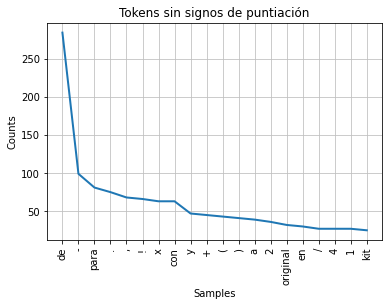

In [13]:
#mayusculas a minusculas
title_txt = title_txt.lower()# se pasa a minusculas

sent_tokens = nltk.sent_tokenize(title_txt)#tokens por frases
word_tokens = nltk.word_tokenize(title_txt)#tokens por palabras

#distribucion de frecuencia de las palabras usando nltk
freq = nltk.FreqDist(word_tokens)

#grafico de la distribución de frecuencias
freq.plot(20, cumulative=False, title = "Tokens sin signos de puntiación")

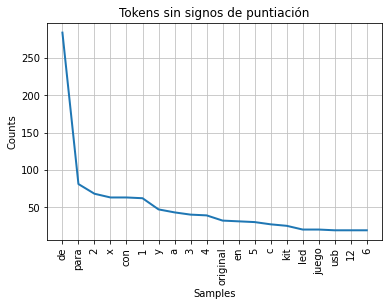

In [14]:
from nltk.tokenize import word_tokenize, regexp_tokenize

#utilizamos una fucnion mas precisa para los tokens, se eliminan algunos signos de puntuación
tokens = regexp_tokenize(title_txt, pattern="\w+")

#distribucion de frecuencia de las palabras usando nltk
freq = nltk.FreqDist(tokens)

#grafico de la distribución de frecuencias
freq.plot(20, cumulative=False, title = "Tokens sin signos de puntiación")

In [0]:
#palabras de parada
from nltk.corpus import stopwords
sr = stopwords.words('spanish')

In [0]:
#limpiamos los tokens
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('spanish'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

#for key,val in freq.items():
#    print (str(key) + ':' + str(val))

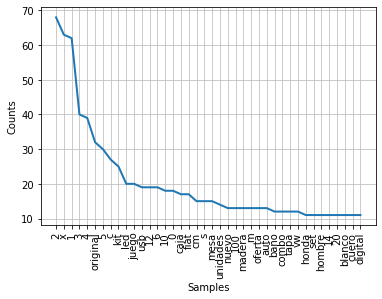

In [17]:
freq.plot(40,cumulative=False)